# Use Support Vector Machines/Naïve Bayes to train your model and compare it with the other models. (use Sci-kit-learn library)

**Here we will compare between many different classification algorithms or models.For example, Suport Vector Machine(svc), K-Neighbors Classifier,Logistic Regression,Navie Bayes**


**Dataset:Pima Indians Diabetes Dataset**

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ClassificationReport
%matplotlib inline

In [14]:
pima = pd.read_csv("C:/Users/jay/ML/Support Vector Machines_prac6_17it041/diabetes.csv")
feature_cols = ['Pregnancies', 'Insulin', 'BloodPressure', 'Age','Glucose','BloodPressure','Diabetes']
x = pima[feature_cols]
y = pima.Outcome

# Data Visualization

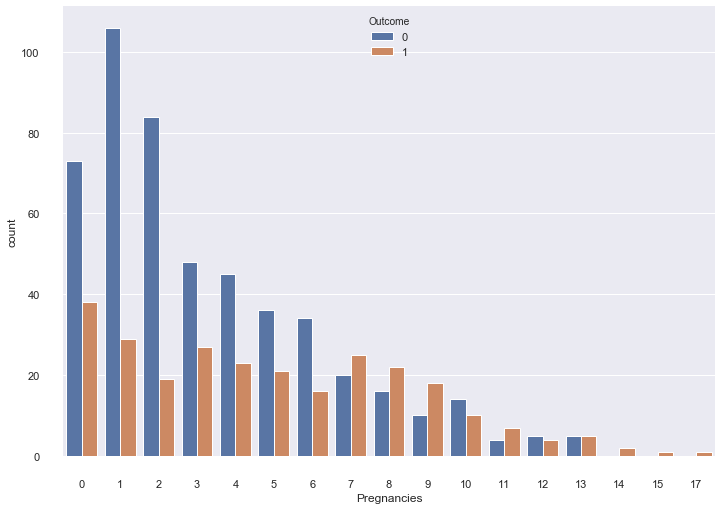

In [15]:
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
# create a countplot
sns.countplot('Pregnancies',data=pima,hue='Outcome')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plotplt.show()

# Training Set & Test Set

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# Building The Model and Performance Comparison

**Logistic Regression Overview**

Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

In [17]:
lr =LogisticRegression(solver='liblinear')
y_pred = lr.fit(x_train, y_train).predict(x_test)
print("Naive-Bayes accuracy : ",accuracy_score(y_test, y_pred, normalize = True))

Naive-Bayes accuracy :  0.7916666666666666


C:\Users\jay\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


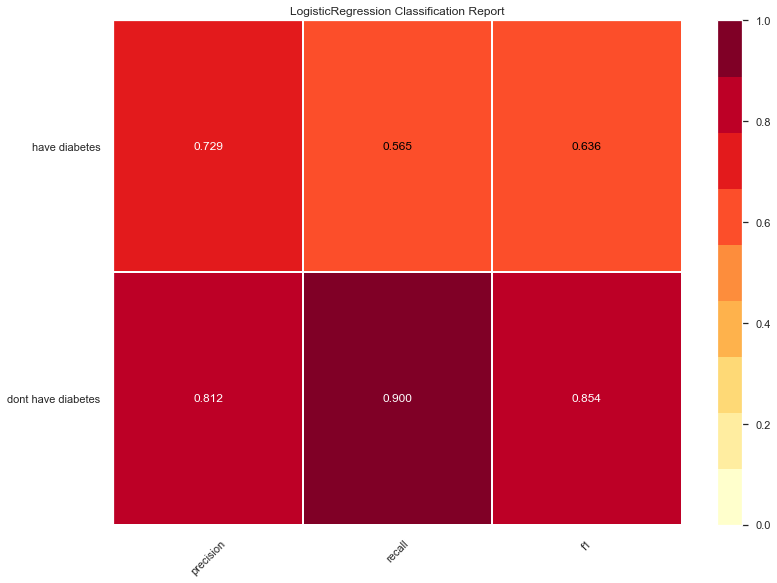

In [18]:
visualizer = ClassificationReport(lr, classes=['dont have diabetes','have diabetes'])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test) 
g = visualizer.poof()

**Naive Bayes**

A set of classification algorithms which “naively” assumes that in a data set every pair of features are independent. This assumption is the underlying principle of Bayes theorem. The algorithms based on this principle are known as Naive-Bayes algorithms.
On a very high level a Naive-Bayes algorithm calculates the probability of the connection of a feature with a target variable and then it selects the feature with the highest probability.


In [19]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("Naive-Bayes accuracy : ",accuracy_score(y_test, y_pred, normalize = True))

Naive-Bayes accuracy :  0.75


C:\Users\jay\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


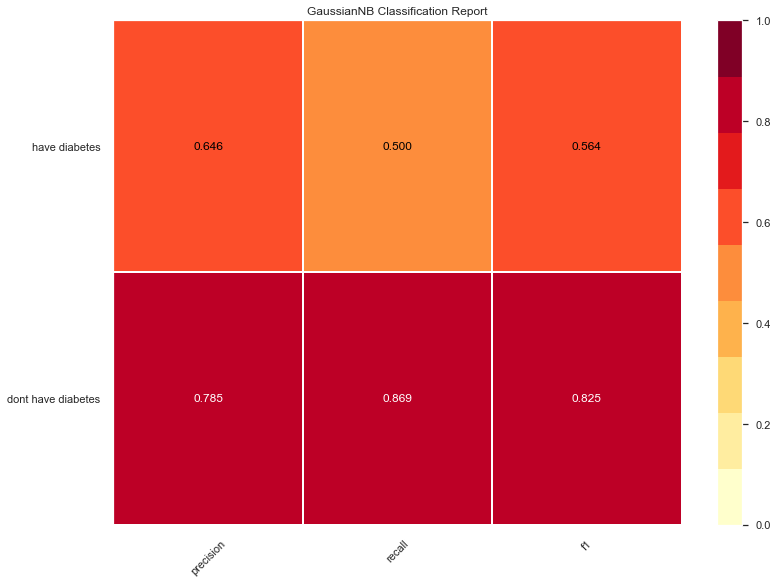

In [20]:
visualizer = ClassificationReport(gnb, classes=['dont have diabetes','have diabetes'])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

**Support vector classification**

LinearSVC or Linear Support Vector Classification is a subclass of the SVM (Support Vector Machine) class. We won’t go into the intricacies of the mathematics involved in this class of algorithms, but on a very basic level LinearSVC tries to divide the data into different planes so that it can find a best possible grouping of different classes. 

In [21]:
svc_model = LinearSVC(random_state=0)
y_pred = svc_model.fit(x_train, y_train).predict(x_test)
print("LinearSVC accuracy : ",accuracy_score(y_test, y_pred, normalize = True))

LinearSVC accuracy :  0.6822916666666666


C:\Users\jay\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\jay\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


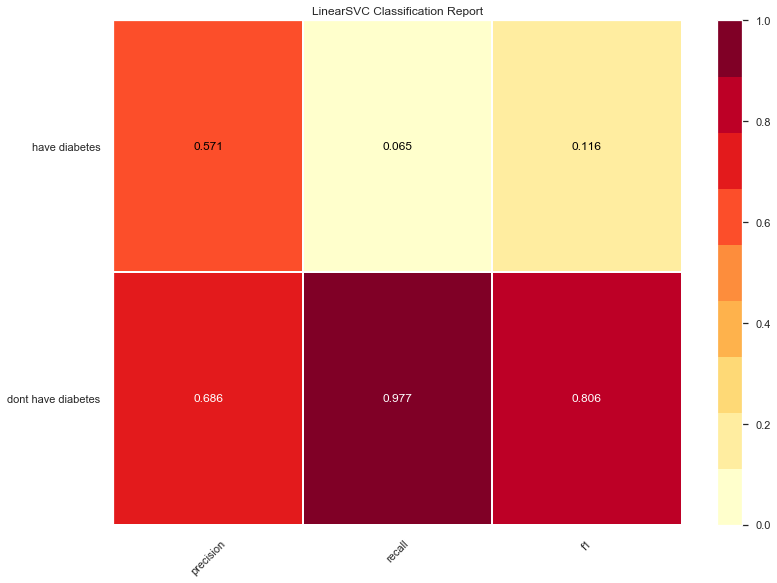

In [22]:
visualizer = ClassificationReport(svc_model, classes=['dont have diabetes','have diabetes'])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
g = visualizer.poof()

**K-Neighbors Classifier**

Compared to the previous two algorithms we’ve worked with, this classifier is a bit more complex. For the purposes of this tutorial we are better off using the KNeighborsClassifier class provided by scikit-learn without worrying much about how the algorithm works.

In [23]:
neigh = KNeighborsClassifier(n_neighbors=3)
y_pred = neigh.fit(x_train, y_train).predict(x_test)
print ("KNeighbors accuracy score : ",accuracy_score(y_test, y_pred))

KNeighbors accuracy score :  0.75


C:\Users\jay\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


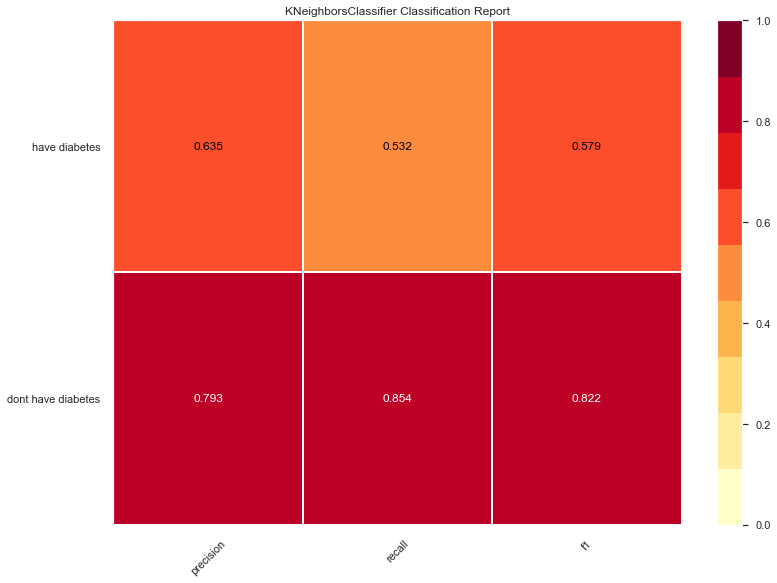

In [24]:
visualizer = ClassificationReport(neigh, classes=['dont have diabetes','have diabetes'])
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test) 
g = visualizer.poof() 